# Task-1 Regression

Task1-Regression: Prediction of Property Resale Prices – given the information about a property (e.g., size, #rooms, location), your task is to predict its price based. This regression task is implemented as a Kaggle InClass Competition.

## Setting Up the NoteBook

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [159]:
data = pd.read_csv('../data/train.csv')
data.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000


## Data Cleaning And EDA Process

In [160]:
print('Before cleaning, there are {} records.'.format(data.shape[0]))
data.isnull().sum()

Before cleaning, there are 20254 records.


listing_id                  0
title                       0
address                     0
property_name               0
property_type               0
tenure                   1723
built_year                922
num_beds                   80
num_baths                 434
size_sqft                   0
floor_level             16746
furnishing                  0
available_unit_types     1441
total_num_units          5652
property_details_url        0
lat                         0
lng                         0
elevation                   0
subzone                   113
planning_area             113
price                       0
dtype: int64

### Drop Some Field

In [161]:
data = data.drop(['elevation', 'floor_level', 'listing_id', 'address', 'property_name', 'title', 'property_details_url',
                  'total_num_units'], axis=1)

### Fill nan value

In [162]:
# fill na by mean
data[['built_year', 'num_beds', 'num_baths']] = data[['built_year', 'num_beds', 'num_baths']].fillna(
    data[['built_year', 'num_beds', 'num_baths']].mean())

# fill na by mode
data['available_unit_types'] = data['available_unit_types'].fillna(data['available_unit_types'].mode()[0])
data['tenure'] = data['tenure'].fillna(data['tenure'].mode()[0])

### Filter out outliers

In [163]:
# filter out outliers
data = data[(data['size_sqft'] <= data['size_sqft'].quantile(0.99)) & (data['size_sqft'] > 10)]

### drop some records

In [164]:
data = data[data['planning_area'].notna()]

In [165]:
print('After cleaning, there are now {} records.'.format(data.shape[0]))
data.isnull().sum()

After cleaning, there are now 19939 records.


property_type           0
tenure                  0
built_year              0
num_beds                0
num_baths               0
size_sqft               0
furnishing              0
available_unit_types    0
lat                     0
lng                     0
subzone                 0
planning_area           0
price                   0
dtype: int64

### Data visualization

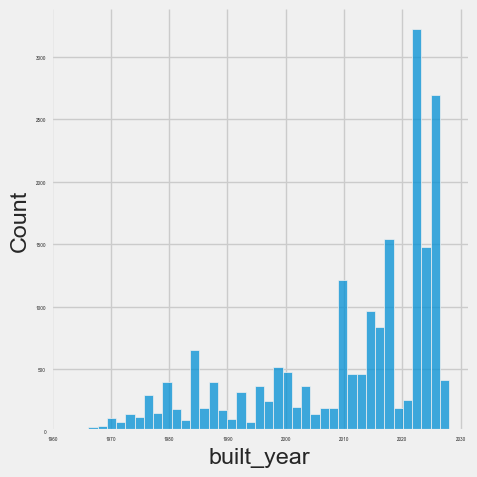

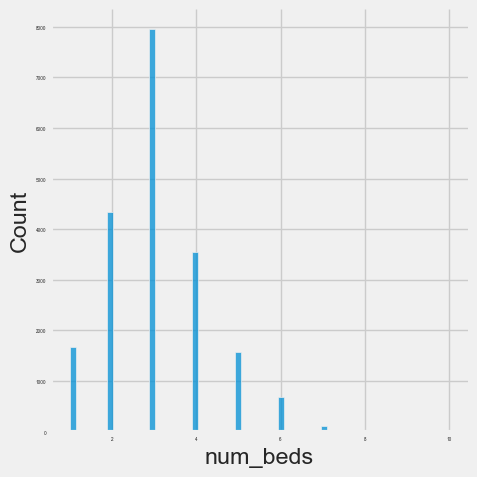

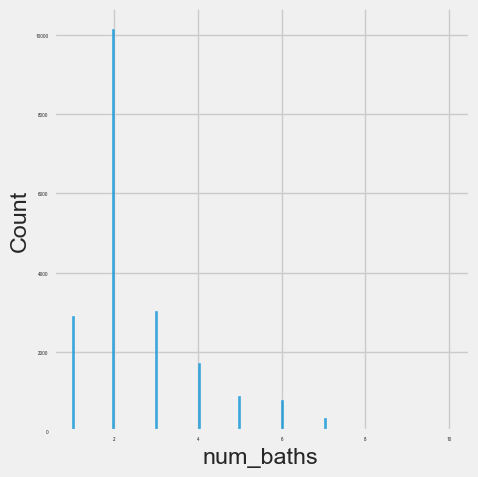

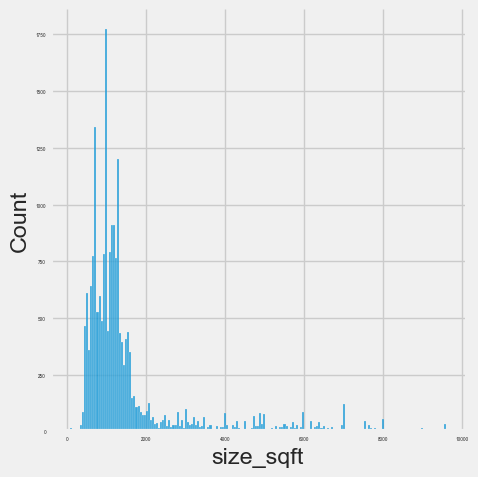

In [166]:
data['built_year'] = data['built_year'].astype(int)
data['num_baths'] = data['num_baths'].astype(int)
data['num_beds'] = data['num_beds'].astype(int)
sns.displot(data, x="built_year")
sns.displot(data, x="num_beds")
sns.displot(data, x="num_baths")
sns.displot(data, x="size_sqft")

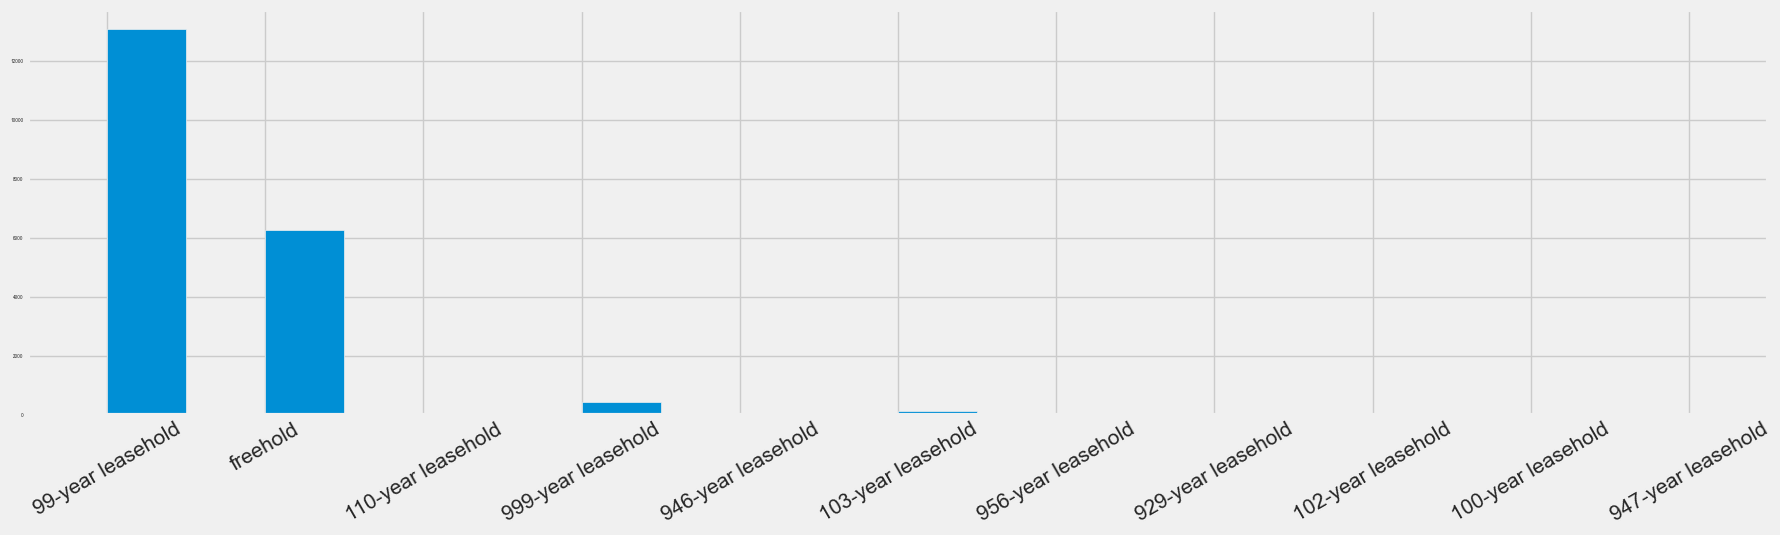

In [167]:
data = data.astype({'tenure': 'string'})
plt.figure(figsize=(20, 5), )
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=30)
plt.hist(data.tenure, bins=20)
plt.show()

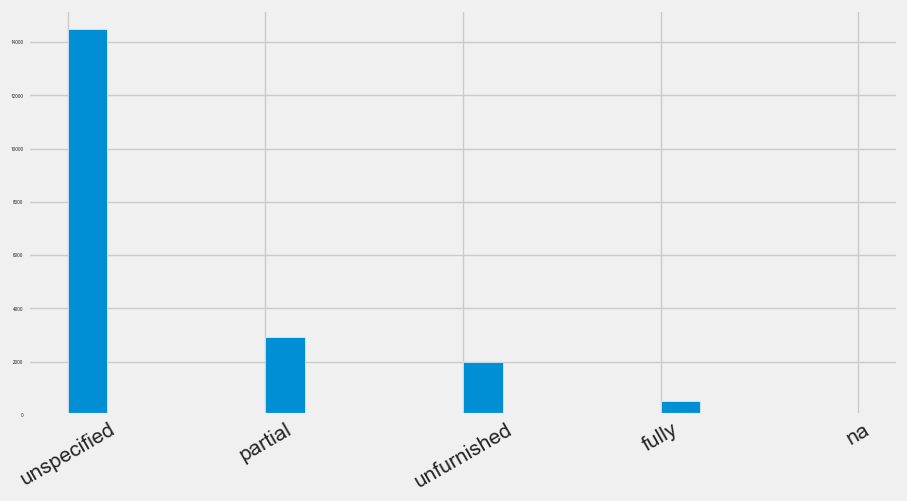

In [168]:
data = data.astype({'furnishing': 'string'})
plt.figure(figsize=(10, 5), )
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=30)
plt.hist(data.furnishing, bins=20)
plt.show()

In [169]:
print('After cleaning, there are now {} records each with {} attributes'.format(data.shape[0], data.shape[1]))
print(data.head())

After cleaning, there are now 19939 records each with 13 attributes
  property_type             tenure  built_year  num_beds  num_baths  \
0   hdb 4 rooms  99-year leasehold        1988         3          2   
1           hdb  99-year leasehold        1992         4          2   
2         condo           freehold        2022         4          6   
3         Condo           freehold        2023         3          2   
4         condo  99-year leasehold        2026         2          1   

   size_sqft   furnishing      available_unit_types       lat         lng  \
0       1115  unspecified  studio, 1, 2, 3, 4, 5 br  1.414399  103.837196   
1       1575  unspecified       1, 2, 3, 4, 5, 6 br  1.372597  103.875625   
2       3070      partial     studio, 3, 4, 5, 6 br  1.298773  103.895798   
3        958      partial     studio, 1, 2, 3, 4 br  1.312364  103.803271   
4        732  unspecified  studio, 1, 2, 3, 4, 5 br  1.273959  103.843635   

           subzone  planning_area    price

### Normalization

In [170]:
normalizer = preprocessing.MinMaxScaler()
data.size_sqft = normalizer.fit_transform(data.size_sqft.values.reshape(-1, 1))
data.lat = normalizer.fit_transform(data.lat.values.reshape(-1, 1))
data.lng = normalizer.fit_transform(data.lng.values.reshape(-1, 1))

### Join with Auxiliary Data

In [171]:
from sklearn.metrics.pairwise import euclidean_distances

commercials = pd.read_csv('../data/auxiliary-data/sg-commerical-centres.csv')
mrts = pd.read_csv('../data/auxiliary-data/sg-mrt-stations.csv')
primary_schools = pd.read_csv('../data/auxiliary-data/sg-primary-schools.csv')
second_schools = pd.read_csv('../data/auxiliary-data/sg-secondary-schools.csv')
shoppings = pd.read_csv('../data/auxiliary-data/sg-shopping-malls.csv')
subzones = pd.read_csv('../data/auxiliary-data/sg-subzones.csv')

#### normalize lat/lng

In [172]:
normalizer = preprocessing.MinMaxScaler()
def normLatLng(X):
    X.lat = normalizer.fit_transform(X.lat.values.reshape(-1, 1))
    X.lng = normalizer.fit_transform(X.lng.values.reshape(-1, 1))
normLatLng(commercials)
normLatLng(mrts)
normLatLng(primary_schools)
normLatLng(second_schools)
normLatLng(shoppings)

### Feature Expand
Joining with auxiliary data, we compute the min distance from the properties to the shopping malls, mrts, commercial centers, etc.

In [173]:
data['shop_dist'] = euclidean_distances(data[['lat', 'lng']], shoppings[['lat', 'lng']]).min(axis=1)
data['mrt_dist'] = euclidean_distances(data[['lat', 'lng']], mrts[['lat', 'lng']]).min(axis=1)
data['commercials_dist'] = euclidean_distances(data[['lat', 'lng']], commercials[['lat', 'lng']]).min(axis=1)
data['second_school_dist'] = euclidean_distances(data[['lat', 'lng']], second_schools[['lat', 'lng']]).min(axis=1)
data['primary_school_dist'] = euclidean_distances(data[['lat', 'lng']], primary_schools[['lat', 'lng']]).min(axis=1)

# subzone: compute population density within the subzone
subzones = subzones[subzones.population > 0]
subzones['density'] = subzones.population / subzones.area_size
subzones.rename(columns = {'name':'subzone'}, inplace = True)
data = data.merge(subzones[['subzone','density']], how='left', on='subzone')
data.head()

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,available_unit_types,lat,lng,subzone,planning_area,price,shop_dist,mrt_dist,commercials_dist,second_school_dist,primary_school_dist,density
0,hdb 4 rooms,99-year leasehold,1988,3,2,0.110121,unspecified,"studio, 1, 2, 3, 4, 5 br",0.787429,0.486672,yishun south,yishun,514500,0.061736,0.073534,0.104155,0.041871,0.033117,31517.683928
1,hdb,99-year leasehold,1992,4,2,0.158364,unspecified,"1, 2, 3, 4, 5, 6 br",0.599096,0.609722,serangoon north,serangoon,995400,0.036886,0.030135,0.027625,0.041148,0.049743,23280.268731
2,condo,freehold,2022,4,6,0.315155,partial,"studio, 3, 4, 5, 6 br",0.266496,0.674318,mountbatten,marine parade,8485000,0.018012,0.016733,0.084034,0.041929,0.029546,5829.779777
3,Condo,freehold,2023,3,2,0.093655,partial,"studio, 1, 2, 3, 4 br",0.327728,0.378045,farrer court,bukit timah,2626000,0.074662,0.058371,0.103774,0.047716,0.058102,11059.413028
4,condo,99-year leasehold,2026,2,1,0.069953,unspecified,"studio, 1, 2, 3, 4, 5 br",0.154702,0.507292,anson,downtown core,1764000,0.014366,0.023230,0.080138,0.065613,0.064488,775.193798


### Label Encoding

In [174]:
labelEnc = preprocessing.LabelEncoder()
data.planning_area = labelEnc.fit_transform(data.planning_area)
data.subzone = labelEnc.fit_transform(data.subzone)
data.furnishing = labelEnc.fit_transform(data.furnishing)
data.tenure = labelEnc.fit_transform(data.tenure)
data.property_type = labelEnc.fit_transform(data.property_type)
data.available_unit_types = labelEnc.fit_transform(data.available_unit_types)

[Text(0, 0.5, 'property_type'),
 Text(0, 1.5, 'tenure'),
 Text(0, 2.5, 'built_year'),
 Text(0, 3.5, 'num_beds'),
 Text(0, 4.5, 'num_baths'),
 Text(0, 5.5, 'size_sqft'),
 Text(0, 6.5, 'furnishing'),
 Text(0, 7.5, 'available_unit_types'),
 Text(0, 8.5, 'lat'),
 Text(0, 9.5, 'lng'),
 Text(0, 10.5, 'subzone'),
 Text(0, 11.5, 'planning_area'),
 Text(0, 12.5, 'price'),
 Text(0, 13.5, 'shop_dist'),
 Text(0, 14.5, 'mrt_dist'),
 Text(0, 15.5, 'commercials_dist'),
 Text(0, 16.5, 'second_school_dist'),
 Text(0, 17.5, 'primary_school_dist'),
 Text(0, 18.5, 'density')]

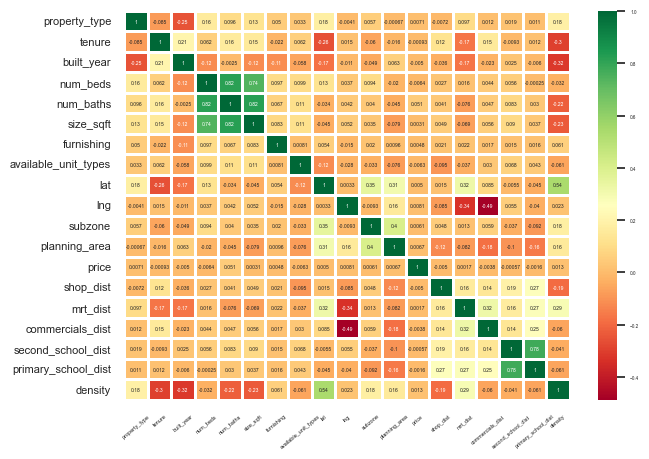

In [175]:
sns.set(font_scale=0.3)
heatmap = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=1)  #data.corr()-->correlation matrix
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=40, fontsize=4)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)